In [1]:
import numpy as np
import sys
import seaborn as sn

#sys.path.append('C:/Users/doeltz/development/RiVaPy')
sys.path.append('/home/doeltz/doeltz/development/RiVaPy/')
sys.path.append('..')
import matplotlib.pyplot as plt
from models.credit_default import get_validation_task_2
import sloth
from sloth.methods.lime import Lime, Lime_Parameter
from sloth.methods.ice import MarginalPlots, MarginalPlots_Parameter, ALE, ALE_Parameter
from sloth.base_parameter import PlotParameter
from sloth.methods.examples import MMD
from sloth.validator import Validator, Validator_Parameter
from sloth.methods.counterfactuals import Counterfactual, DiceML_Parameter

import logging
logger = logging.getLogger('sloth')
logger.setLevel(level=logging.DEBUG)

sn.set_style("whitegrid")
#sn.set_theme()

%matplotlib inline
%load_ext autoreload
%autoreload 2

/home/doeltz/doeltz/development/xai_workshop/notebooks/../../RiVaPy/rivapy/__init__.py:11: UserWarning: The pyvacon module is not available. You may not use all functionality without this module. Consider installing pyvacon.
  warnings.warn('The pyvacon module is not available. You may not use all functionality without this module. Consider installing pyvacon.')


In [2]:
param = Validator_Parameter()
param.pdp_param.n_steps = 30
#param.examples_param.extreme_prediction_param = 'OFF'
#param.examples_param.coordinate_extreme_points = True
#param.to_dict()

In [3]:
validation_task = get_validation_task_2(n_years=10, n_data_per_year=100, seed=42)

In [4]:
validator = Validator(validation_task, param)

INFO:sloth:Choosing datapoints with extreme input (min and max) values as examples.
DEBUG:sloth:5 points with extreme input values chosen as parameter.
INFO:sloth:Computed 5 prototypes and 5 criticisms.


# Examples

In [6]:
validator.examples_hiplot()

Exception: HiPlot not installed. To use this method first install hiplot, see https://facebookresearch.github.io/hiplot/index.html

# PDP

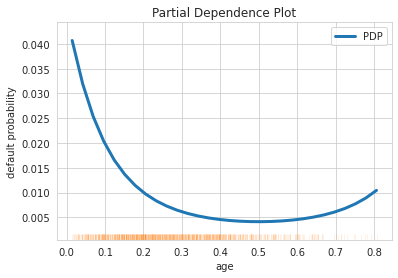

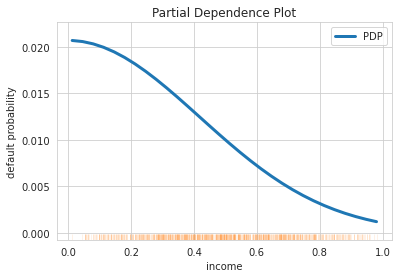

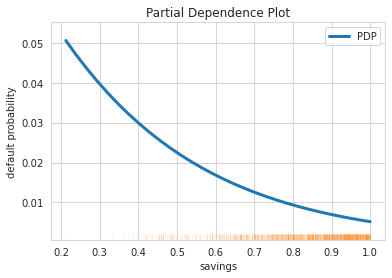

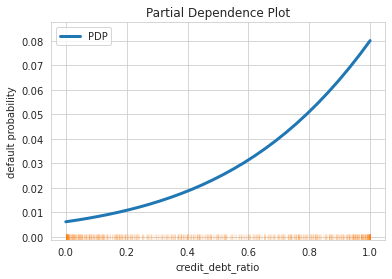

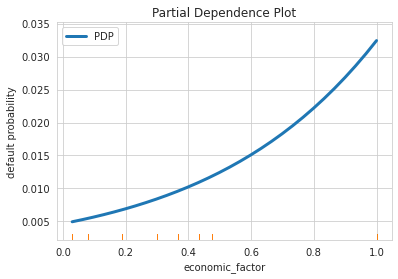

In [7]:
validator.pdp()

# M-Plots

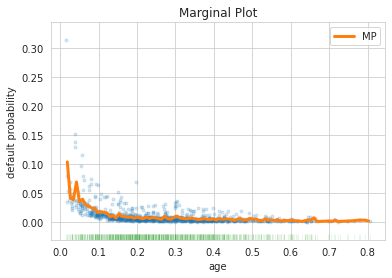

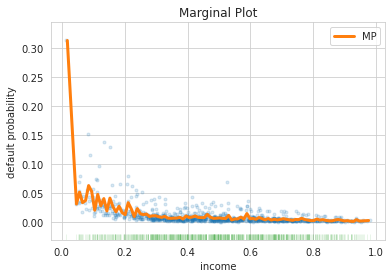

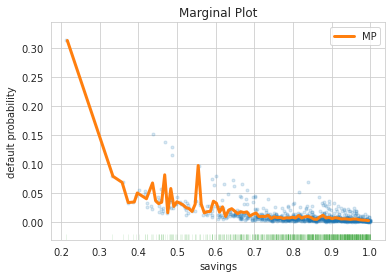

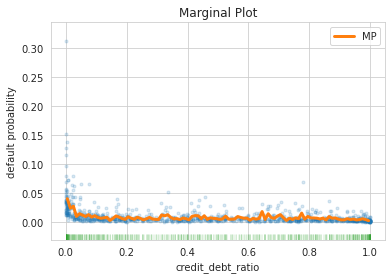

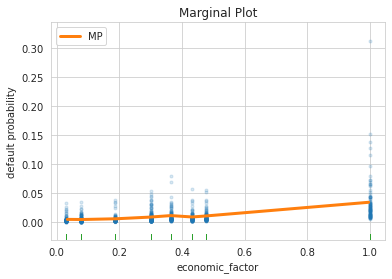

In [8]:
m_plot_param = MarginalPlots_Parameter()
m_plot = MarginalPlots(validation_task, m_plot_param)
m_plot.plot(features=None)

# ALE

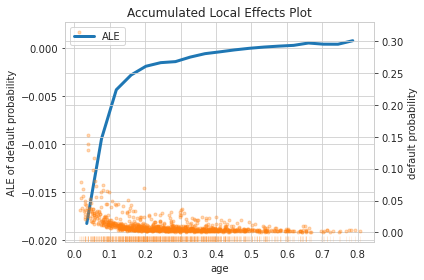

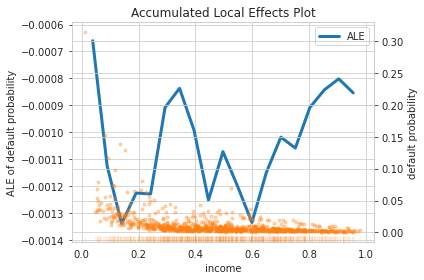

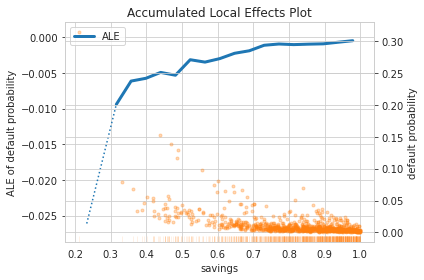

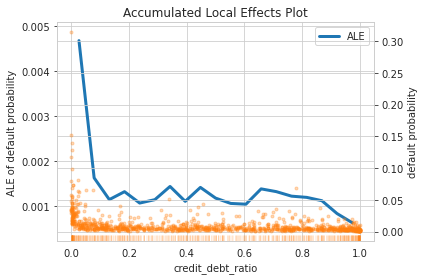

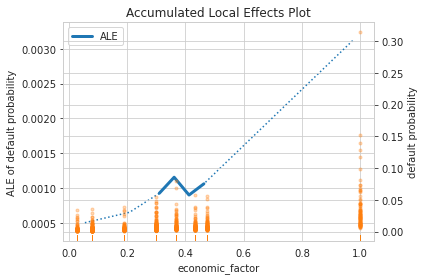

In [9]:
ale_param = ALE_Parameter()
ale_param.n_steps=20
ale = ALE(validation_task, ale_param)
ale.plot(features=None)#f_values=True)

# ICE

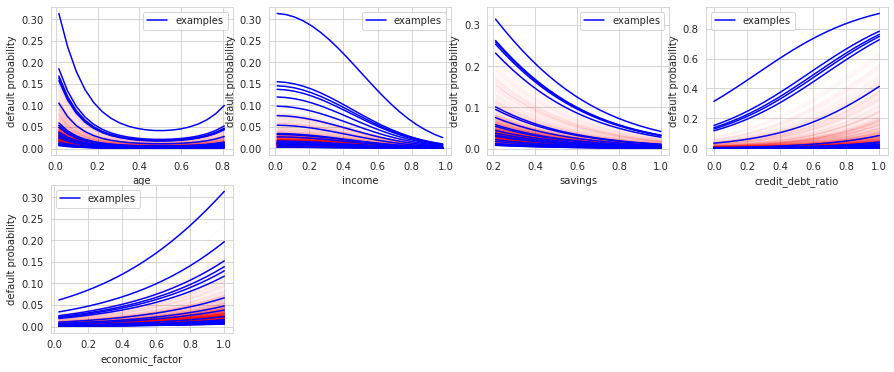

In [10]:
plt.figure(figsize=(15,6))
validator.ice()

DEBUG:sloth:Start functional clustering w.r.t. projection of feature age
DEBUG:sloth:Clustering results found in cache.
DEBUG:sloth.functional_clustering:Found 1 local minima configuration(s).
DEBUG:sloth.functional_clustering:Start clustering for 1000 functions with 0 local minima.
DEBUG:sloth.functional_clustering:Finished clustering for functions with 0 local minima.
DEBUG:sloth:Finished functional clustering w.r.t. projection of feature age
DEBUG:sloth:Start functional clustering w.r.t. projection of feature income
DEBUG:sloth:Clustering results found in cache.
DEBUG:sloth.functional_clustering:Found 1 local minima configuration(s).
DEBUG:sloth.functional_clustering:Start clustering for 1000 functions with 0 local minima.
DEBUG:sloth.functional_clustering:Finished clustering for functions with 0 local minima.
DEBUG:sloth:Finished functional clustering w.r.t. projection of feature income
DEBUG:sloth:Start functional clustering w.r.t. projection of feature savings
DEBUG:sloth:Cluster

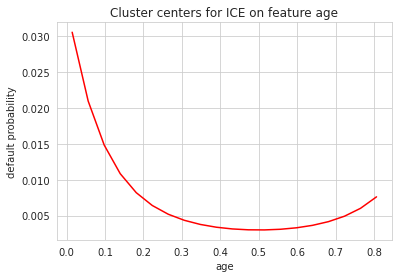

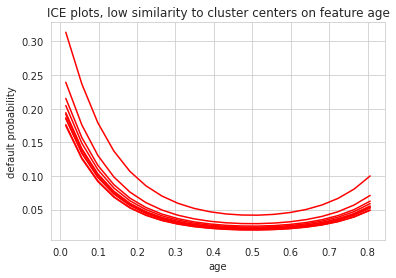

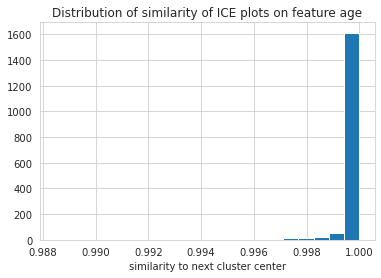

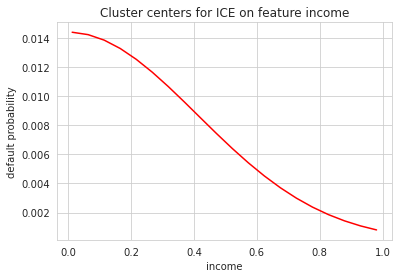

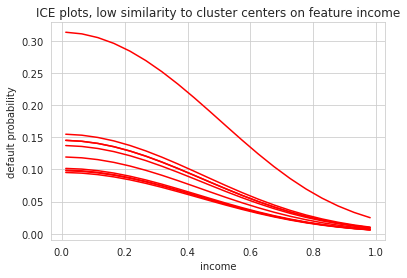

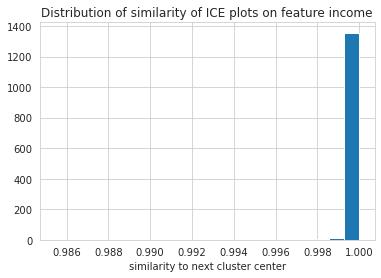

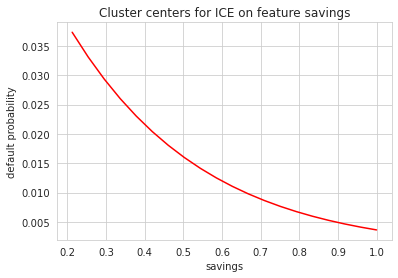

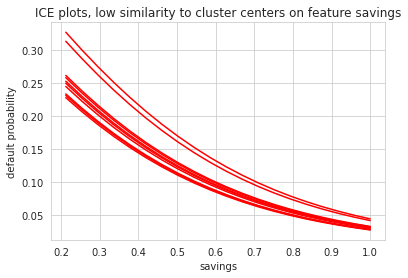

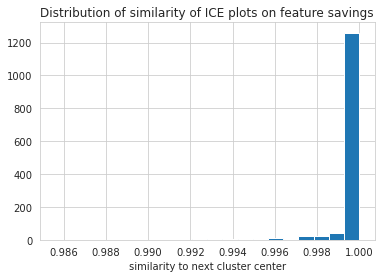

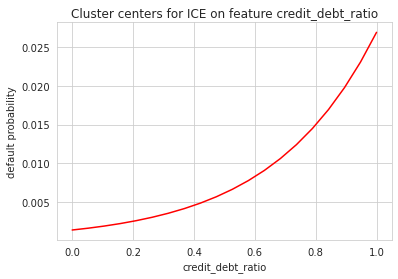

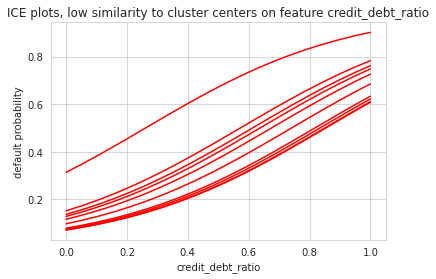

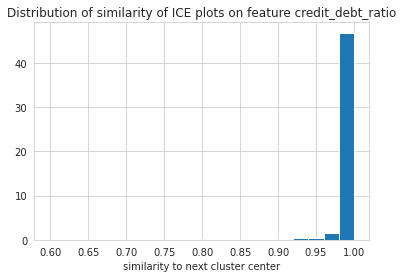

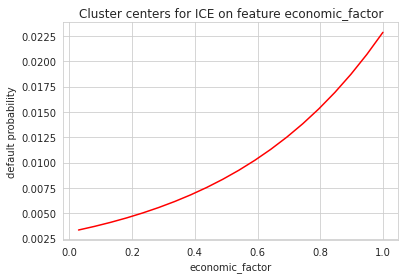

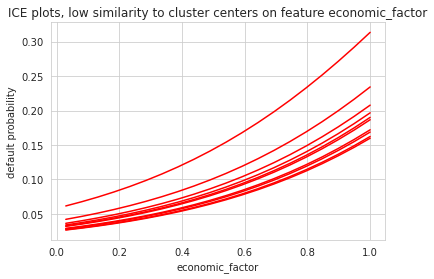

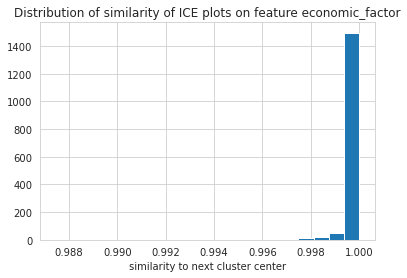

In [11]:
validator.ice_cluster()

# LIME

In [12]:
lime_param = Lime_Parameter()
lime_param.stddev_eps = 15.0
lime_param.n_points_neighborhood = 1000
lime = Lime(validation_task, param = lime_param, examples=validator.examples)
point = 0

In [13]:
neighborhood = lime._create_neighborhood(point=validator.examples.points[0])

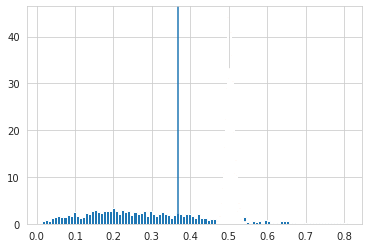

In [14]:
feature = 0
plt.hist(validation_task.x[:,feature], bins=100, density=True)
plt.hist(neighborhood[:,feature], bins=40, density=True)
plt.axvline(validation_task.x[point, feature]);

INFO:sloth:Using ridge regression (with cross-validation) as local interpretable model in LIME.
DEBUG:sloth:Best possible value for alpha due to cross-validation: 0.01
INFO:sloth:Using ridge regression (with cross-validation) as local interpretable model in LIME.
DEBUG:sloth:Best possible value for alpha due to cross-validation: 0.01
INFO:sloth:Using ridge regression (with cross-validation) as local interpretable model in LIME.
DEBUG:sloth:Best possible value for alpha due to cross-validation: 0.01
INFO:sloth:Using ridge regression (with cross-validation) as local interpretable model in LIME.
DEBUG:sloth:Best possible value for alpha due to cross-validation: 0.01
INFO:sloth:Using ridge regression (with cross-validation) as local interpretable model in LIME.
DEBUG:sloth:Best possible value for alpha due to cross-validation: 0.01
INFO:sloth:Using ridge regression (with cross-validation) as local interpretable model in LIME.
DEBUG:sloth:Best possible value for alpha due to cross-validatio

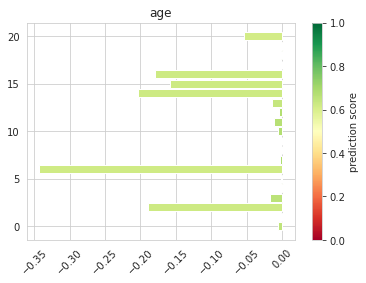

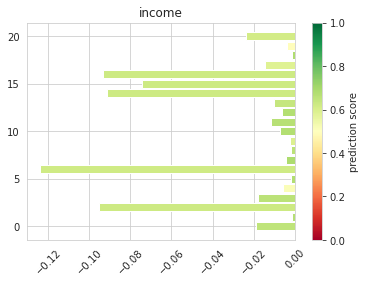

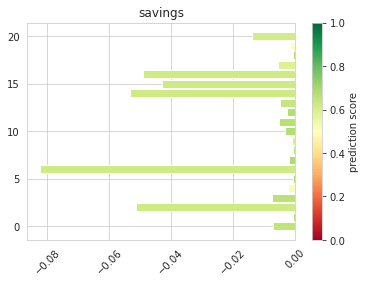

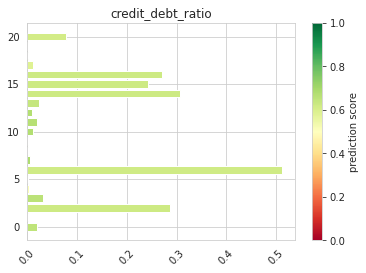

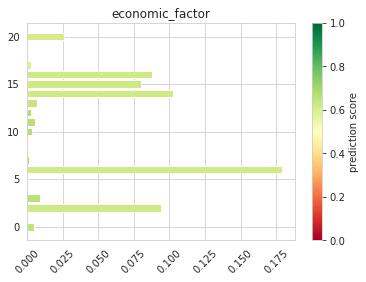

In [15]:
#plt.figure(figsize=(16,20))
plot_param = PlotParameter()
plot_param.use_subplots = False
plot_param.new_figure = True
lime_param = Lime_Parameter()
lime_param.n_points_neighborhood = 20
lime_param.max_n_features_linear_regression = 1
lime_param.stddev_eps = 15.0
lime = Lime(validation_task, param = lime_param, examples=validator.examples)
lime.plot_by_instances(plot_param)

INFO:sloth:Using ridge regression (with cross-validation) as local interpretable model in LIME.
DEBUG:sloth:Best possible value for alpha due to cross-validation: 0.01
INFO:sloth:Using ridge regression (with cross-validation) as local interpretable model in LIME.
DEBUG:sloth:Best possible value for alpha due to cross-validation: 0.01
INFO:sloth:Using ridge regression (with cross-validation) as local interpretable model in LIME.
DEBUG:sloth:Best possible value for alpha due to cross-validation: 0.01
INFO:sloth:Using ridge regression (with cross-validation) as local interpretable model in LIME.
DEBUG:sloth:Best possible value for alpha due to cross-validation: 0.01
INFO:sloth:Using ridge regression (with cross-validation) as local interpretable model in LIME.
DEBUG:sloth:Best possible value for alpha due to cross-validation: 0.01
INFO:sloth:Using ridge regression (with cross-validation) as local interpretable model in LIME.
DEBUG:sloth:Best possible value for alpha due to cross-validatio

AttributeError: Rectangle.set() got an unexpected keyword argument 'points'

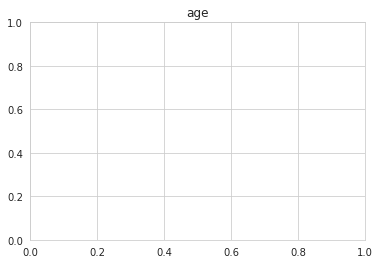

In [16]:
plot_param = PlotParameter()
plot_param.use_subplots = False
plot_param.new_figure = True
lime_param.n_points_neighborhood = 1000
lime_param.alpha = 0.5
lime_param.stddev_eps = 15.0
lime = Lime(validation_task, param = lime_param, examples=validator.examples)
lime.plot_by_instances(plot_param, points=validator.examples.points)

# Counterfactuals

## Simple Search in Data

In [17]:
cf = Counterfactual(validation_task)

In [18]:
target_value  = validation_task.y_pred[0]+0.04
counterfactuals, cf2 = cf.cf_in_data(validation_task.x[0,:], 
                                       target_value=target_value, 
                                       target_eps = 0.01,
                                        max_counterfactuals=2,
                                       distance_type='abs')

In [19]:
from IPython.display import display
display(cf.get_table(validation_task.x[0,:],cf2))

,Feature,Example,cf_0,cf_1
0,age,0.368307,0.304046,0.300651
1,income,0.633172,0.593175,0.481294
2,savings,0.924711,0.924711,0.880540
3,credit_debt_ratio,0.686362,0.863199,0.686362
4,economic_factor,0.187270,1.000000,1.000000
5,prediction,0.002815,0.033695,0.032924
6,distance,0.000000,6.629870,7.334051


## Dice_ML

In [20]:
dice_param = DiceML_Parameter(max_counterfactuals=2, method='random')
cf = Counterfactual(validation_task, dice_param)

In [21]:
counterfactuals = cf.compute_dice_ml(validation_task.x[0,:], target_range=[0.038, 0.042])
display(cf.get_table(validation_task.x[0,:],counterfactuals))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.53it/s]


,Feature,Example,cf_0,cf_1
0,age,0.368307,0.368307,0.368307
1,income,0.633172,0.633172,0.127481
2,savings,0.924711,0.341778,0.924711
3,credit_debt_ratio,0.686362,0.999505,0.686362
4,economic_factor,0.187270,0.187270,0.939633
5,prediction,0.002815,0.039865,0.038750
6,distance,0.000000,7.832476,7.901149


In [23]:
display(cf.get_table(validation_task.x[0,:],counterfactuals))

,Feature,Example,cf_0,cf_1
0,age,0.368307,0.368307,0.368307
1,income,0.633172,0.633172,0.127481
2,savings,0.924711,0.341778,0.924711
3,credit_debt_ratio,0.686362,0.999505,0.686362
4,economic_factor,0.187270,0.187270,0.939633
5,prediction,0.002815,0.039865,0.038750
6,distance,0.000000,7.832476,7.901149


# Shap

# Anchors